In [3]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Загружаем набор данных о событиях.
events = pd.read_csv(r"C:\Users\ASUS\Desktop\пет проекты\даш\events.csv")
item_properties_part1 = pd.read_csv(r"C:\Users\ASUS\Desktop\пет проекты\даш\item_properties_part1.csv")
item_properties_part2 = pd.read_csv(r"C:\Users\ASUS\Desktop\пет проекты\даш\item_properties_part2.csv")
category_tree = pd.read_csv(r"C:\Users\ASUS\Desktop\пет проекты\даш\category_tree.csv")

# 1. Предварительный анализ данных

In [5]:
# Просмотр первых строк каждого датафрейма
print(events.head())
print(item_properties_part1.head())
print(item_properties_part2.head())
print(category_tree.head())

       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN
       timestamp  itemid    property                            value
0  1435460400000  460429  categoryid                             1338
1  1441508400000  206783         888          1116713 960601 n277.200
2  1439089200000  395014         400  n552.000 639502 n720.000 424566
3  1431226800000   59481         790                       n15360.000
4  1431831600000  156781         917                           828513
       timestamp  itemid property            value
0  1433041200000  183478      561           769062
1  1439694000000  132256      976  n26.400 1135780
2  1435460400000  420307      921  1149317 1257525
3  1431831600000  403324      917 

In [6]:
# Преобразование timestamp в дата-время для каждого датафрейма
events['event_time'] = pd.to_datetime(events['timestamp'], unit='ms')
item_properties_part1['timestamp'] = pd.to_datetime(item_properties_part1['timestamp'], unit='ms')
item_properties_part2['timestamp'] = pd.to_datetime(item_properties_part2['timestamp'], unit='ms')

In [7]:
# Объединение item_properties_part1 и part2
item_properties = pd.concat([item_properties_part1, item_properties_part2])

In [8]:
# Соединение events и item_properties по itemid
merged_data = pd.merge(events, item_properties, on='itemid', how='left')

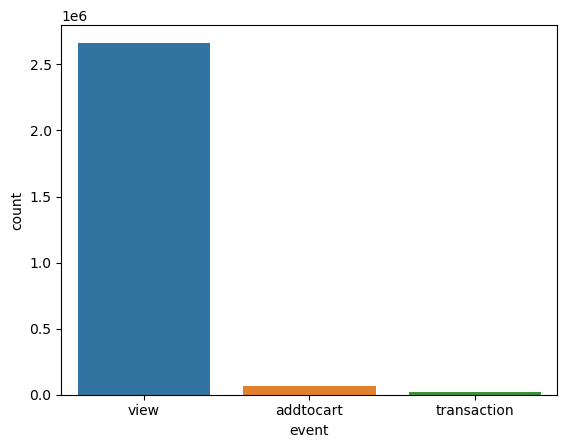

In [8]:
# Распределение событий по категориям
sns.countplot(x='event', data=events)
plt.show()

In [9]:
# Проверка дубликатов и NaN
print("Events: ", events.isnull().sum())
print("Item Properties Part 1: ", item_properties_part1.isnull().sum())
print("Item Properties Part 2: ", item_properties_part2.isnull().sum())
print("Category Tree: ", category_tree.isnull().sum())

# Проверка на дубликаты
print("Дубликаты в events: ", events.duplicated().sum())
print("Дубликаты в item_properties: ", item_properties.duplicated().sum())

Events:  timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
event_time             0
dtype: int64
Item Properties Part 1:  timestamp    0
itemid       0
property     0
value        0
dtype: int64
Item Properties Part 2:  timestamp    0
itemid       0
property     0
value        0
dtype: int64
Category Tree:  categoryid     0
parentid      25
dtype: int64
Дубликаты в events:  460
Дубликаты в item_properties:  0


In [10]:
# Удаление дубликатов в events
events = events.drop_duplicates()

# Проверка на дубликаты после удаления
print("Дубликаты в events после удаления: ", events.duplicated().sum())

Дубликаты в events после удаления:  0


In [11]:
# Заполнение NaN значениями в transactionid
events['transactionid'] = events['transactionid'].fillna(0)

In [12]:
# Заполнение NaN значениями в parentid
category_tree['parentid'] = category_tree['parentid'].fillna(-1)

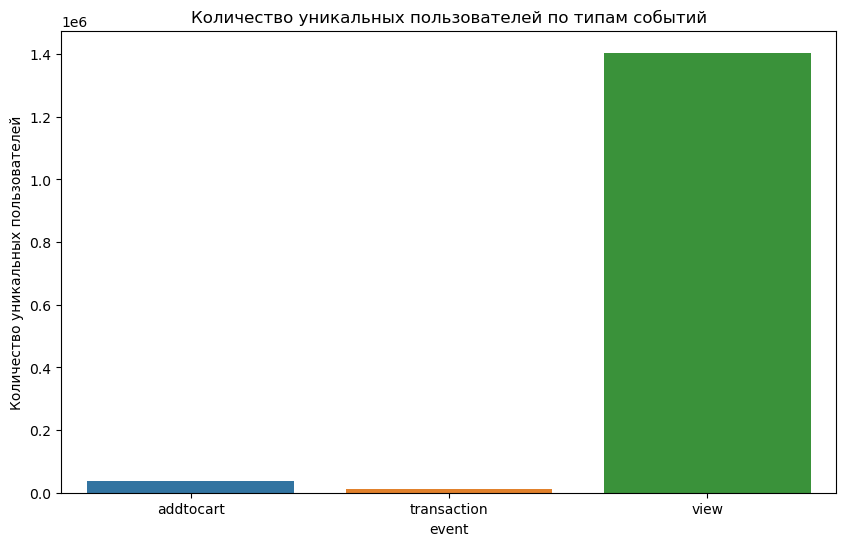

addtocart: 37722 уникальных пользователей
transaction: 11719 уникальных пользователей
view: 1404179 уникальных пользователей


In [13]:
# Количество уникальных пользователей по типам событий
unique_visitors = events.groupby('event')['visitorid'].nunique()

plt.figure(figsize=(10,6))
sns.barplot(x=unique_visitors.index, y=unique_visitors.values)
plt.title('Количество уникальных пользователей по типам событий')
plt.ylabel('Количество уникальных пользователей')
plt.show()

for event, count in unique_visitors.items():
    print(f'{event}: {count} уникальных пользователей')

# 2. Построение ключевых метрик

## Анализ поведения пользователей

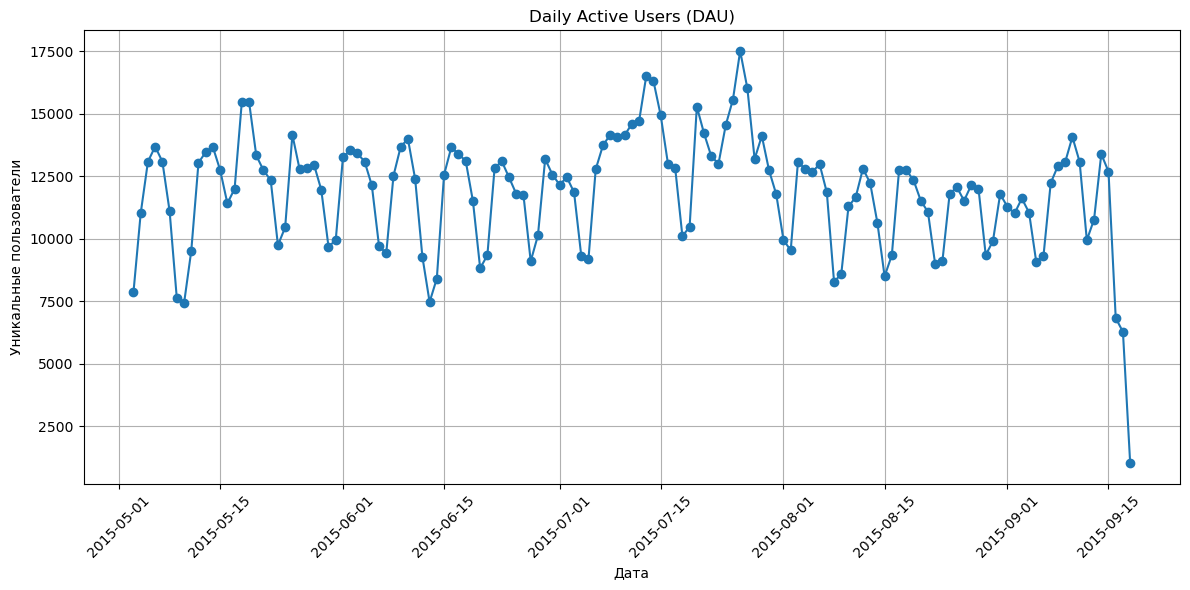

In [14]:
# Вычисление DAU
dau = merged_data.groupby(merged_data['event_time'].dt.date)['visitorid'].nunique()
plt.figure(figsize=(12, 6))
dau.plot(kind='line', marker='o')
plt.title('Daily Active Users (DAU)')
plt.xlabel('Дата')
plt.ylabel('Уникальные пользователи')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

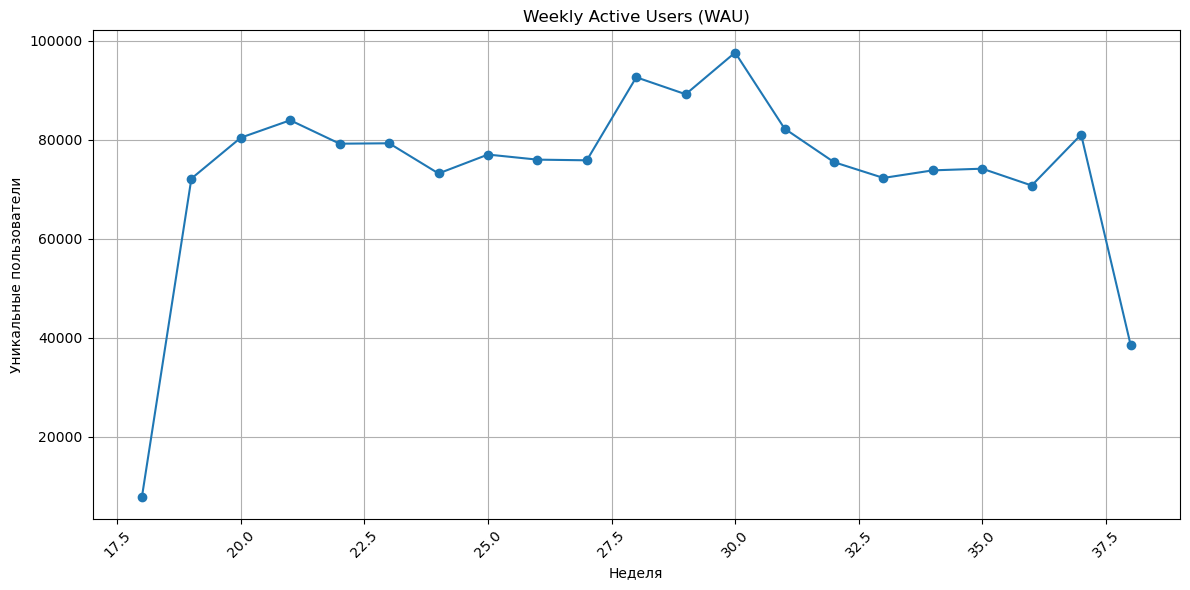

In [15]:
# Вычисление WAU
merged_data['week'] = merged_data['event_time'].dt.isocalendar().week
wau = merged_data.groupby('week')['visitorid'].nunique()
plt.figure(figsize=(12, 6))
wau.plot(kind='line', marker='o')
plt.title('Weekly Active Users (WAU)')
plt.xlabel('Неделя')
plt.ylabel('Уникальные пользователи')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

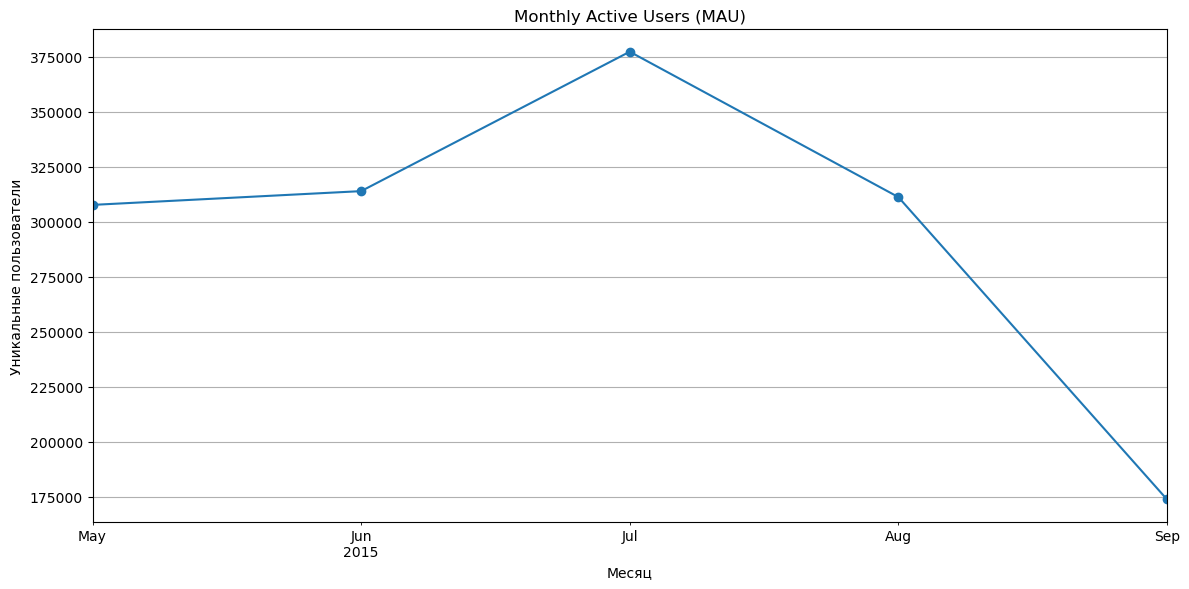

In [16]:
# Вычисление MAU
merged_data['month'] = merged_data['event_time'].dt.to_period('M')
mau = merged_data.groupby('month')['visitorid'].nunique()
plt.figure(figsize=(12, 6))
mau.plot(kind='line', marker='o')
plt.title('Monthly Active Users (MAU)')
plt.xlabel('Месяц')
plt.ylabel('Уникальные пользователи')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

В ходе анализа метрик DAU, WAU и MAU видно, что среднее количество пользователей составляет 80,000 в неделю и 12,500 в день. Сначала наблюдается рост до 375,000 в месяц, что может указывать на успешные маркетинговые акции или увеличение интереса к продукту. Однако после этого происходит резкое снижение всех показателей. Это может быть связано с сезонными колебаниями, изменением интересов пользователей или усилением конкуренции.

Retention Rate (Коэффициент удержания пользователей)
Для расчета Retention Rate нужно вычислить, сколько пользователей возвращаются спустя определенный период после первого взаимодействия.

In [17]:
# Пример расчета Retention Rate для первой и второй недели
first_week = merged_data[merged_data['week'] == merged_data['week'].min()]['visitorid'].unique()
second_week = merged_data[merged_data['week'] == merged_data['week'].min() + 1]['visitorid'].unique()

retention_rate = len(set(first_week) & set(second_week)) / len(first_week)
print(f"Retention Rate: {retention_rate:.2%}")

Retention Rate: 9.52%


Retention Rate для первой и второй недели составил 9.52%. Это означает, что лишь около 10% пользователей, которые взаимодействовали с продуктом на первой неделе, вернулись на вторую. Низкий показатель удержания может свидетельствовать о том, что пользователи не находят достаточной ценности в продукте или что конкуренция на рынке высока. Это также указывает на необходимость улучшения пользовательского опыта и стратегии по удержанию клиентов, чтобы повысить этот показатель в будущем.

Вычислим среднее время между ключевыми событиями.

In [18]:
# Преобразуем 'timestamp' в формат времени
events['timestamp'] = pd.to_datetime(events['timestamp'], unit='ms')

# Разница между временем просмотра и покупки для каждого пользователя и товара
view_to_purchase_time = events[events['event'] == 'transaction'].merge(
    events[events['event'] == 'view'], on=['visitorid', 'itemid'], suffixes=('_purchase', '_view')
)

view_to_purchase_time['time_diff'] = (view_to_purchase_time['timestamp_purchase'] - view_to_purchase_time['timestamp_view']).dt.total_seconds() / 3600  # Время в часах
average_time_diff = view_to_purchase_time['time_diff'].mean()
print(f"Среднее время между просмотром и покупкой: {average_time_diff:.2f} часов")


Среднее время между просмотром и покупкой: 6.12 часов


Среднее время между просмотром и покупкой составило 6.12 часов. Это указывает на то, что пользователи, как правило, не совершают покупки немедленно после просмотра товаров. Средний период ожидания может быть обусловлен необходимостью дополнительного времени для принятия решения, сравнения альтернатив или простого изучения информации о продукте.

In [19]:
# Определение сессий: если действия совершаются с интервалом менее 30 минут, то это одна сессия
events = events.sort_values(by=['visitorid', 'timestamp'])
events['session_diff'] = events.groupby('visitorid')['timestamp'].diff().dt.total_seconds().fillna(0)
events['session'] = (events['session_diff'] > 1800).cumsum()

# Количество событий в сессии
session_data = events.groupby('session')['event'].count()
avg_session_length = session_data.mean()
print(f"Среднее количество событий в сессии: {avg_session_length:.2f}")


Среднее количество событий в сессии: 7.78


Среднее количество событий в сессии составило 7.78. Это может свидетельствовать о том, что пользователи активно взаимодействуют с платформой и, вероятно, исследуют несколько товаров или категорий за одну сессию.

## Анализ продуктов и категорий

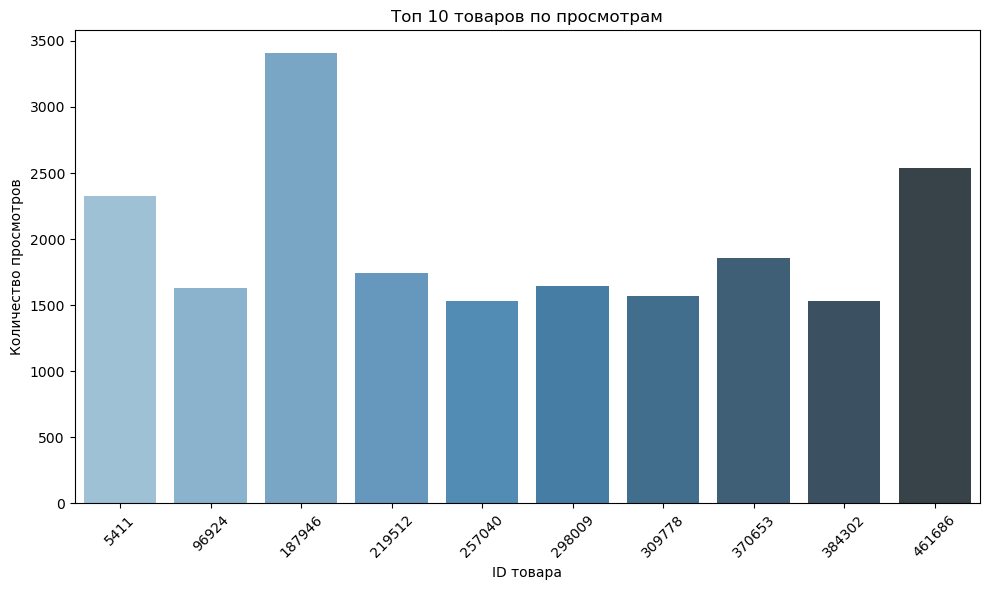

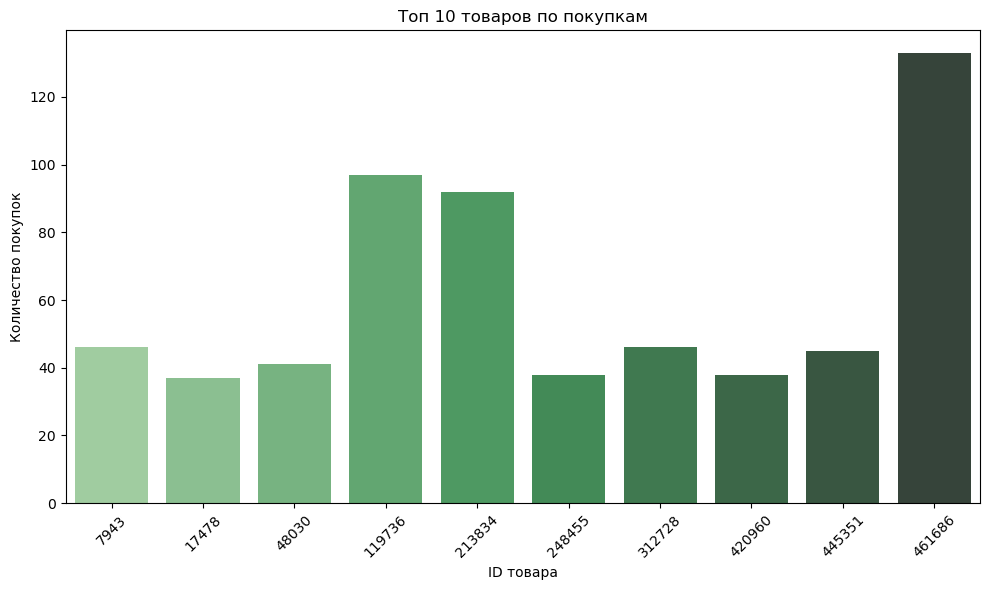

In [20]:
# Топ 10 товаров по просмотрам
top_viewed_items = events[events['event'] == 'view']['itemid'].value_counts().head(10)

# Топ 10 товаров по покупкам
top_purchased_items = events[events['event'] == 'transaction']['itemid'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_viewed_items.index, y=top_viewed_items.values, palette="Blues_d")
plt.title('Топ 10 товаров по просмотрам')
plt.xlabel('ID товара')
plt.ylabel('Количество просмотров')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=top_purchased_items.index, y=top_purchased_items.values, palette="Greens_d")
plt.title('Топ 10 товаров по покупкам')
plt.xlabel('ID товара')
plt.ylabel('Количество покупок')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


    1. Топ 10 товаров по просмотрам включает такие товары, как ID 187946 и ID 461686, которые имели значительно больше всего просмотров, чем другие товары.
    2. Топ 10 товаров по покупкам показывает, что только ID 461686 с 133 покупками выделяется на фоне других, что может указывать на его привлекательность для пользователей, несмотря на то, что он не был в топе по просмотрам. Это может говорить о высокой конверсии данного товара.

In [21]:
# Количество просмотров и покупок для каждого товара
viewed_items = events[events['event'] == 'view'].groupby('itemid')['visitorid'].count()
purchased_items = events[events['event'] == 'transaction'].groupby('itemid')['visitorid'].count()

# Конверсия по товарам
conversion_rate_per_item = (purchased_items / viewed_items).fillna(0)
top_conversion_items = conversion_rate_per_item.sort_values(ascending=False).head(10)
print("Топ 10 товаров по конверсии:")
print(top_conversion_items)

Топ 10 товаров по конверсии:
itemid
28789     2.500000
132633    2.333333
111436    2.000000
1510      2.000000
192003    2.000000
69410     1.000000
50722     1.000000
292320    1.000000
287472    1.000000
22626     1.000000
Name: visitorid, dtype: float64


Топ 10 товаров по конверсии показывает, что некоторые товары имеют конверсию более 2.0, что является довольно высоким показателем. Например, ID 28789 имеет конверсию 2.5, что указывает на то, что более чем каждый второй просмотр этого товара заканчивается покупкой.

Используя таблицы item_properties и category_tree, можно вычислить популярность категорий товаров.

In [8]:
# Преобразуем столбец value в числовой тип данных (если возможно)
# Удалим строки, которые не могут быть преобразованы в числовой формат
item_properties['value'] = pd.to_numeric(item_properties['value'], errors='coerce')

# Удаляем строки с NaN в столбце 'value', так как это значит, что они не могут быть преобразованы в числа
item_properties = item_properties.dropna(subset=['value'])

# Преобразуем 'value' в тип int
item_properties['value'] = item_properties['value'].astype(int)

# Объединение events и item_properties по itemid
events_with_categories = pd.merge(events, item_properties, on='itemid', how='left')

# Объединение с category_tree по 'value' и 'categoryid'
events_with_categories = pd.merge(events_with_categories, category_tree, left_on='value', right_on='categoryid', how='left')

# Количество просмотров и покупок по категориям
category_view_count = events_with_categories[events_with_categories['event'] == 'view'].groupby('categoryid')['visitorid'].count()
category_purchase_count = events_with_categories[events_with_categories['event'] == 'transaction'].groupby('categoryid')['visitorid'].count()

# Топ категории по просмотрам и покупкам
top_viewed_categories = category_view_count.sort_values(ascending=False).head(10)
top_purchased_categories = category_purchase_count.sort_values(ascending=False).head(10)

print("Топ 10 категорий по просмотрам:")
print(top_viewed_categories)

print("Топ 10 категорий по покупкам:")
print(top_purchased_categories)


Топ 10 категорий по просмотрам:
categoryid
1.0       12637552
0.0        8720772
1613.0      463474
491.0       352299
1120.0      224280
1509.0      134288
1277.0      107575
642.0        95906
1483.0       80625
1167.0       79860
Name: visitorid, dtype: int64
Топ 10 категорий по покупкам:
categoryid
1.0       171650
0.0        94501
1509.0      2015
1613.0      1994
491.0       1528
1120.0       900
720.0        724
72.0         661
822.0        656
707.0        648
Name: visitorid, dtype: int64


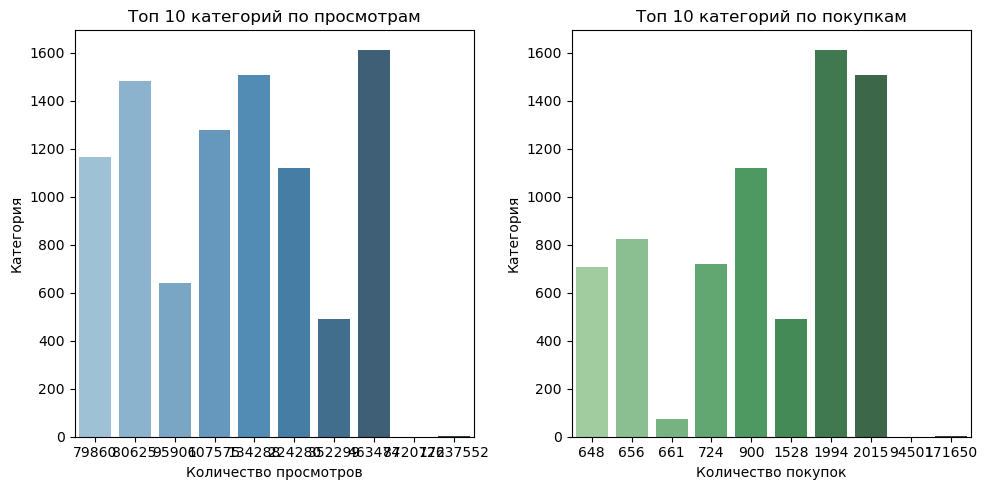

In [10]:
# Построим графики
plt.figure(figsize=(10, 5))

# График топ-10 категорий по просмотрам
plt.subplot(1, 2, 1)
sns.barplot(x=top_viewed_categories.values, y=top_viewed_categories.index, palette="Blues_d")
plt.title('Топ 10 категорий по просмотрам')
plt.xlabel('Категория')
plt.ylabel('Количество просмотров')

# График топ-10 категорий по покупкам
plt.subplot(1, 2, 2)
sns.barplot(x=top_purchased_categories.values, y=top_purchased_categories.index, palette="Greens_d")
plt.title('Топ 10 категорий по покупкам')
plt.xlabel('Категория')
plt.ylabel('Количество покупок')

# Показываем графики
plt.tight_layout()
plt.show()

Топ 10 категорий по просмотрам показывает, что категория с ID 1613 привлекла наибольшее количество просмотров (463462), что может указывать на интерес к данной категории. Однако, в топе по покупкам лидером является категория с ID 1509, что говорит о высокой конверсии в этой категории.

#### В данной работе был проведен анализ поведения пользователей на платформе: было исследованна активность, удержание, время между просмотром и покупкой, а также выявили популярные товары и категории. Мы определили, что ежедневно сайт посещает около 12,500 уникальных пользователей, но уровень удержания низкий — лишь 9.52% возвращаются через неделю. Также выяснили, что среднее время до покупки составляет 6.12 часов, и выделили товары с высокой конверсией.

In [9]:
# Экспорт объединенного датасета в CSV файл
merged_data.to_csv(r"C:\Users\ASUS\Desktop\пет проекты\даш\merged_data.csv", index=False)